# 1.Use MNIST dataset to train our model using handwritten recognition.

Make sure to install cv2 and tensorflow libraries before importing!!!

In [2]:
#Import all the libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
# import our dataset using tensorflow
mnist = tf.keras.datasets.mnist

### Preprocessing

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [6]:
def createModel(hiddenLayers=[128, 128], dropoutRate=0, activation='relu', optimizer='adam',
                loss='sparse_categorical_crossentropy', metrics=['accuracy']):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(shape=(28, 28, 1)))
    model.add(tf.keras.layers.Flatten())
    # Creating hidden layers
    for count in hiddenLayers:
        model.add(tf.keras.layers.Dense(count, activation=activation))
        model.add(tf.keras.layers.Dropout(dropoutRate))
    
    # Output layer with 10 neurons
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    return model

In [7]:
# model = createModel(hiddenLayers=[128, 32], dropoutRate=0)

# Works better on handwritten digits, but takes longer to train
model = createModel(hiddenLayers=[512, 256, 128, 64, 32, 16])

### Determine optimal hyperparameters

In [8]:
# from sklearn.model_selection import GridSearchCV
# from scikeras.wrappers import KerasClassifier
# param_grid = {
#     'epochs': [1, 2, 3],
#     'hiddenLayers': [
#         [4, 2], [16, 16]
#     ]
# }

# grid = GridSearchCV(estimator=KerasClassifier(model=createModel, hiddenLayers=[], epochs=0), param_grid=param_grid, scoring="accuracy")

# grid_result = grid.fit(x_train, y_train)
# print("Best parameters: ", grid_result.best_params_)
# print("Best accuracy: {:.2f}%".format(grid_result.best_score_ * 100))

### Training the model with a set seed

In [9]:
# Funney
seed = hash("Group6TheBest") % (10**9 + 7)
tf.random.set_seed(seed)
np.random.seed(seed)

model.fit(x_train, y_train, epochs=6)

Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8329 - loss: 0.5179
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9673 - loss: 0.1133
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9776 - loss: 0.0774
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9821 - loss: 0.0602
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9875 - loss: 0.0429
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9879 - loss: 0.0422


In [1]:
model.save('handwritten.model')

NameError: name 'model' is not defined

In [ ]:
# model = tf.keras.models.load_model('handwritten.model')
# model = tf.keras.models.load_model('handwritten.model', compile=False) 

In [ ]:
# model.compile()

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

In [ ]:
print(loss)
print(accuracy)

## Testing it with my own handwritten numbers

In [ ]:
image_number = 1

# Enable interactive mode for matplotlib
plt.ion()

image_number = 0
# folder_name = "digits_samples"
folder_name = "jason_digits"

while os.path.isfile(f"{folder_name}/digit{image_number}.png"):
    try:
        # Debugging statement
        print(f"Processing: {folder_name}/digit{image_number}.png")
        
        img = cv2.imread(f"{folder_name}/digit{image_number}.png")[:,:,0]
        img = np.invert(np.array([img]))
        
        # Ensure the image is correctly read and processed
        if img is not None:
            prediction = model.predict(img)
            print(f"This digit is probably a {np.argmax(prediction)}")
            plt.imshow(img[0], cmap=plt.cm.binary)
            plt.show()
        else:
            print(f"Failed to load image {folder_name}/digit{image_number}.png")
            
    except Exception as e:
        print(f"Error: {e}")
    finally:
        image_number += 1

# Turn off interactive mode
plt.ioff()

### Parse some expression

In [13]:
import cv2
import numpy as np
dim = 28

def isEmpty(imgBin):
    imgBin = imgBin[0]
    for row in imgBin:
        if row.tolist().count(0)!=dim: return False
    return True
    
def splitExpression(path="expression0.png", verbose=False, displayOrig=True):
    img = cv2.imread(path)[:,:,0]
    divs = img.shape[1]//dim

    if displayOrig:
        temp = np.invert(np.array([img]))
        plt.imshow(temp[0], cmap=plt.cm.binary)
        plt.show()
    res = []
    for i in range(divs):
        sub = img[1:dim+1, i*29+1:i*29+1+dim]
        sub = np.invert(np.array([sub]))
        
        if isEmpty(sub): break

        res.append(sub)
        if verbose:
            plt.imshow(sub[0], cmap=plt.cm.binary)
            plt.show()
    return res

lookup = [str(i) for i in range(10)] + list("+-*/()")
def getToken(img, verbose=False):
    return lookup[np.argmax(model.predict(img, verbose=verbose))]

def parseExpression(path="expression0.png", verbose=False, displayOrig=True):
    images = splitExpression(path=path, verbose=verbose)
    return "".join(map(getToken, images))

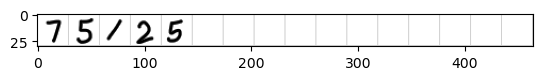

75125


In [14]:
print(parseExpression(verbose=0))

### eval() Demo

In [15]:
eval("13*52//(10*12+69-20)")

4

In [16]:
# Jason's 20 x 16 dataset

dim = 28
    
def getHandwrittenData(path="handwritten_training_data.png", verbose=False, displayOrig=True):
    img = cv2.imread(path)[:,:,0]

    if displayOrig:
        temp = np.invert(np.array([img]))
        plt.imshow(temp[0], cmap=plt.cm.binary)
        plt.show()
    
    resInput = [None]*16
    for row in range(16):
        cur = [None]*20
        for col in range(20):
            sub = img[row*29+1:row*29+29, col*29+1:col*29+29]
            sub = np.invert(np.array([sub]))
    
            cur[col]=sub
            if verbose:
                plt.imshow(sub[0], cmap=plt.cm.binary)
                plt.show()
        resInput[row] = cur

    resOutput = [None]*(20*16)
    for i in range(16):
        output = [0] * 16
        output[i]=1
        for idx in range(i*20, i*20+20):
            resOutput[idx]=output
    return resInput, resOutput
# getHandwrittenData()

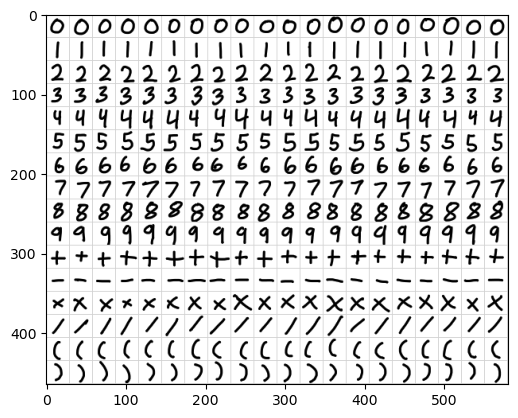

In [17]:
resInput, resOutput = getHandwrittenData(path="handwritten_training_data.png", verbose=False, displayOrig=True)


In [1]:
# resOutput

In [2]:
# resInput

In [20]:
# Reshape the input data if necessary (e.g., for TensorFlow compatibility)
resInput = tf.reshape(resInput, (-1, 28, 28, 1))  # Assuming each image is 28x28 pixels
resOutput = tf.reshape(resOutput, (-1, 16, 1))  # Assuming each image is 28x28 pixels


In [21]:

resInput, resOutput = getHandwrittenData(path="handwritten_training_data.png", verbose=False, displayOrig=False)

resInput = np.array(resInput)
resOutput = np.array(resOutput)


resInput = resInput.reshape(-1, 28, 28, 1)


model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='sigmoid'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(16, activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Funney
seed = hash("Group6TheBest") % (10**9 + 7)
X_test = tf.stack([resInput[i] for i in range(0, 320, 20)])
y_test = tf.stack([resOutput[i] for i in range(0, 320, 20)])

tf.keras.utils.set_random_seed(seed)
tf.config.experimental.enable_op_determinism()

model.fit(resInput, resOutput, epochs=20, validation_data=(X_test, y_test))


# model = createModel(hiddenLayers=[96, 32], dropoutRate=0)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.0795 - loss: 2.9606 - val_accuracy: 0.2500 - val_loss: 2.6260
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3223 - loss: 2.4925 - val_accuracy: 0.5625 - val_loss: 2.2381
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6721 - loss: 2.0867 - val_accuracy: 0.7500 - val_loss: 1.8608
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7463 - loss: 1.7606 - val_accuracy: 0.8125 - val_loss: 1.5062
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8451 - loss: 1.4486 - val_accuracy: 1.0000 - val_loss: 1.2552
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9249 - loss: 1.1908 - val_accuracy: 1.0000 - val_loss: 1.0222
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9691 - loss: 0.9755 - val_accuracy: 1.0000 - val_loss: 0.8435
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9751 - loss: 0.8054 - val_accuracy: 0.9375 - val_loss

In [22]:
import tensorflow as tf
import numpy as np



# Evaluate the model on the training data
loss, accuracy = model.evaluate(resInput, resOutput)

print(f"Model Loss: {loss}")
print(f"Model Accuracy: {accuracy * 100:.2f}%")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.1307  
Model Loss: 0.1366930603981018
Model Accuracy: 100.00%


In [23]:
def getAccuracy(path="tokens0.png"):
    res = parseExpression(verbose=0, path=path)
    exp = "".join(lookup)
    mismatch = [" "]*16
    acc=0
    for i in range(len(res)):
        if res[i]==exp[i]: acc+=1
        else: mismatch[i]="^"
    print(exp)
    print(res)
    print("".join(mismatch))
    print("Accuracy:", acc/16)

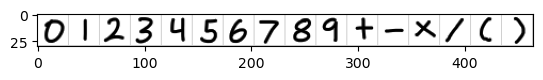

0123456789+-*/()
01334567891-*/()
  ^       ^     
Accuracy: 0.875


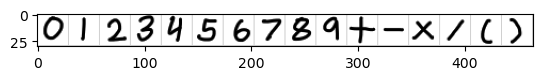

0123456789+-*/()
0123456784+-*/()
         ^      
Accuracy: 0.9375


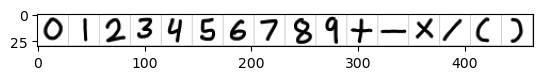

0123456789+-*/()
0123456754+-*/()
        ^^      
Accuracy: 0.875


In [24]:
getAccuracy("tokens0.png")
getAccuracy("tokens1.png")
getAccuracy("tokens2.png")

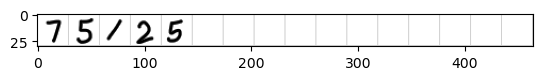

75/25
3.0


In [25]:
expr = parseExpression(path="expression0.png")
print(expr)
print(eval(expr))

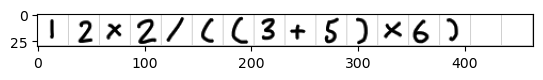

12*2/((3+5)*6)
0.5


In [26]:
expr = parseExpression(path="expression1.png")
print(expr)
print(eval(expr))

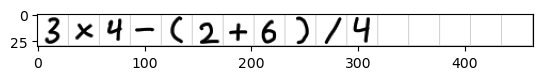

3*4-(2+6)/4
10.0


In [29]:
expr = parseExpression(path="expression2.png")
print(expr)
print(eval(expr))